Importing libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,learning_curve
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,precision_recall_fscore_support,precision_score,recall_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [5]:
data= pd.read_csv(r"C:\Users\Ananya\OneDrive - Northeastern University\hehe\Portfolio_projects\Coursera_project\Breast cancer detection\tumor_data.csv")
data.dtypes


Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [6]:
data.head(20)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [8]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

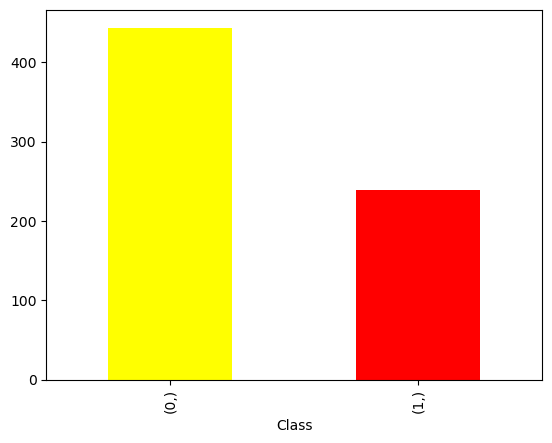

In [9]:
data.iloc[:,-1:].value_counts(normalize=True)
data.iloc[:,-1:].value_counts().plot.bar(color=['yellow','red'])
plt.show()

In [56]:
# from sklearn.preprocessing import MinMaxScaler
# mm= MinMaxScaler()
# X=mm.fit_transform(X)
# print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0


In [10]:
rs = np.random.RandomState(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state= rs)

In [11]:
print(f"Training dataset, X_train:{X_train.shape}, y_train:{y_train.shape}")
print(f"Testing dataset, X_test:{X_test.shape}, y_train:{y_test.shape}")

Training dataset, X_train:(546, 9), y_train:(546, 1)
Testing dataset, X_test:(137, 9), y_train:(137, 1)


Logistic Regression with L2 penalty

In [12]:
penalty='l2'
solver='lbfgs'
max_iter=1000

In [13]:
model_1= LogisticRegression(random_state=rs,penalty=penalty,solver=solver,max_iter=max_iter)

In [14]:
model_1.fit(X_train,y_train)

c:\Users\Ananya\anaconda3\envs\coursera_project\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000,
                   random_state=RandomState(MT19937) at 0x23AE18C3740)

In [15]:
model_1_pred=model_1.predict(X_test)

In [16]:
def get_metrics(yt,yp):
    results_pos={}
    results_pos['accuracy']=accuracy_score(yt,yp)
    precision,recall,f_beta,_=precision_recall_fscore_support(yt,yp)
    results_pos['recall']=recall
    results_pos['precision']=precision
    results_pos['f1score']=f_beta
    return results_pos

In [17]:
get_metrics(y_test,model_1_pred)

{'accuracy': 0.9635036496350365,
 'recall': array([0.95505618, 0.97916667]),
 'precision': array([0.98837209, 0.92156863]),
 'f1score': array([0.97142857, 0.94949495])}

Logistic Regression with l1 penalty

In [18]:
penalty='l1'
solver='saga'
max_iter=1000

In [19]:
model_2=LogisticRegression(random_state=rs,penalty=penalty,solver=solver,max_iter=1000)

In [20]:
model_2.fit(X_train,y_train)

c:\Users\Ananya\anaconda3\envs\coursera_project\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ananya\anaconda3\envs\coursera_project\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, penalty='l1',
                   random_state=RandomState(MT19937) at 0x23AE18C3740,
                   solver='saga')

In [21]:
model_2_pred=model_2.predict(X_test)

In [22]:
get_metrics(y_test,model_2_pred)

{'accuracy': 0.9635036496350365,
 'recall': array([0.95505618, 0.97916667]),
 'precision': array([0.98837209, 0.92156863]),
 'f1score': array([0.97142857, 0.94949495])}

In [23]:
cf=confusion_matrix(y_test,model_1_pred,normalize='true')

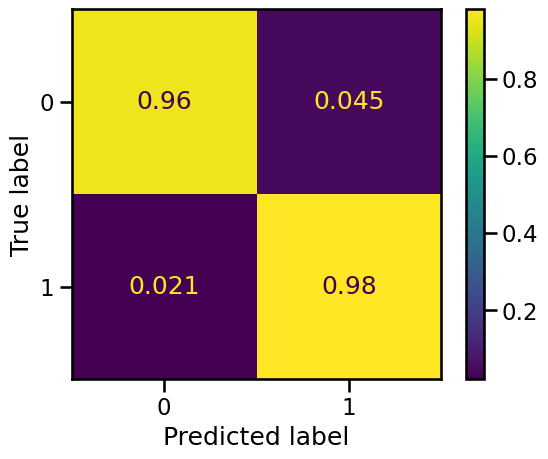

In [24]:
import seaborn as sns
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=model_1.classes_)
disp.plot()
plt.show()

KNN-model


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [26]:
knn_model_pred=knn_model.predict(X_test)

In [27]:
def get_metrics(yt,yp):
    results_pos={}
    results_pos['accuracy']=accuracy_score(yt,yp)
    precision,recall,f_beta,_=precision_recall_fscore_support(yt,yp,average='binary')
    results_pos['recall']=recall
    results_pos['precision']=precision
    results_pos['f1score']=f_beta
    return results_pos

In [28]:
get_metrics(y_test,knn_model_pred)

{'accuracy': 0.9416058394160584,
 'recall': 0.9166666666666666,
 'precision': 0.9166666666666666,
 'f1score': 0.9166666666666666}

In [29]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train.values.ravel())

KNeighborsClassifier()

In [30]:
knn_model_pred=knn_model.predict(X_test)

In [31]:
get_metrics(y_test,knn_model_pred)

{'accuracy': 0.9562043795620438,
 'recall': 0.9583333333333334,
 'precision': 0.92,
 'f1score': 0.9387755102040817}

In [32]:
max_neighbor=50
f1_scores=[]

In [34]:
for k in range(1,max_neighbor+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(X_train,y_train.values.ravel())
    preds=knn.predict(X_test)
    f1=f1_score(preds,y_test)
    f1_scores.append((k,round(f1_score(y_test,preds),4)))
f1_results=pd.DataFrame(f1_scores,columns=['k','F1score'])
f1_results.set_index("k")

,F1score
k,
1,0.9388
2,0.9167
3,0.9278
4,0.9278
5,0.9388
6,0.9388
7,0.9388
8,0.9388
9,0.9388


Text(0.5, 1.0, 'KNN F1 Score')

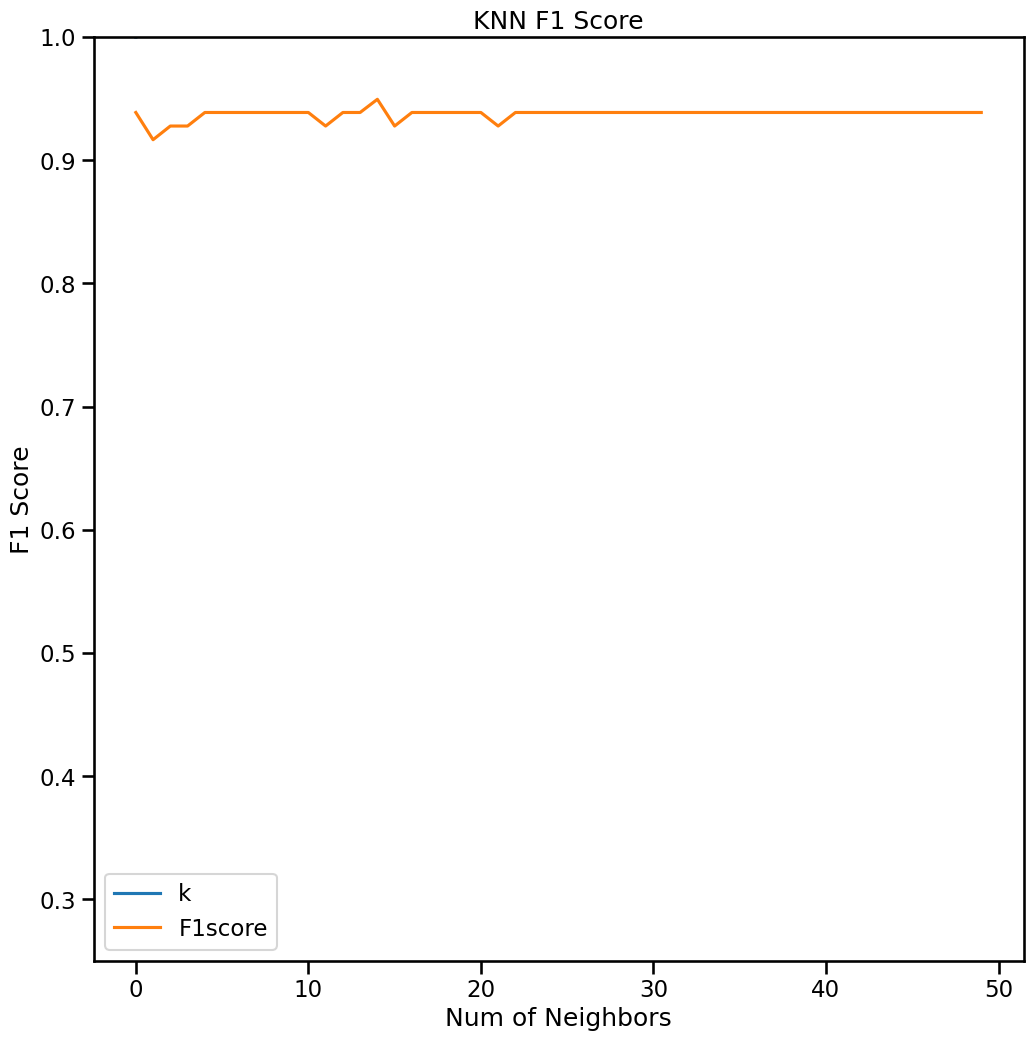

In [35]:
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
#ax.set_xticks(range(1, max_neighbor, 2));
plt.ylim((0.25, 1))
plt.title('KNN F1 Score')

Decision Tree

In [37]:
### BEGIN SOLUTION
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [38]:
dt.tree_.node_count, dt.tree_.max_depth

(43, 7)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [40]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,1.0,0.948905
precision,1.0,0.918367
recall,1.0,0.937500
f1,1.0,0.927835


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [42]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(15, 3)

In [43]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [44]:
train_test_gr_error

,train,test
accuracy,0.976190,0.941606
precision,0.968421,0.916667
recall,0.963351,0.916667
f1,0.965879,0.916667


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
n_estimators=20
M_features=X.shape[1]
max_features=round(np.sqrt(M_features))-1
max_features

2

In [51]:
model = RandomForestClassifier( max_features=max_features,n_estimators=n_estimators, random_state=42)

In [52]:
model.fit(X_train,y_train)

C:\Users\Ananya\AppData\Local\Temp\ipykernel_34672\2721349307.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier(max_features=2, n_estimators=20, random_state=42)

In [53]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"trian Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [54]:
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.9635036496350365, 'trian Accuracy': 1.0}
